In [1]:
import pandas as pd
import numpy as np

In [54]:
# Question 1 : Read the Excel data into a data frame. the “Data” sheet is what interests us.
# 
df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRisnQjodySbp6-XXPGhdsVMp2stg_gyuxw42pP41tuxeic63IARau6bV1TgjLiw_ciAWsTO5LarPqT/pub?output=xlsx',sheet_name=1,usecols=['Departure port','Commodity','Tonnage','Country','Income group','Development category','Departure','Flag'])

In [132]:
# Question 2 : Create a pivot table, showing how many tons of each commodity (rows) have left each port (columns). (My Take)
df.pivot_table(index='Departure port',values='Tonnage',aggfunc='sum',columns='Commodity')

Commodity,Barley,Canola,Corn,Mixed,Peas,Rapeseed,Rapeseed meal,Soya beans,Soya oil,Sugar beet pellets,Sunflower meal,Sunflower oil,Sunflower pellets,Sunflower seed,Vegetable oil,Wheat,Wheat bran pellets
Departure port,,,,,,,,,,,,,,,,,
Chornomorsk,280891.00,113071.0,6565869.99,2000.0,13820.0,493201.0,5550.0,206423.0,5170.0,14000.0,1180746.86,588172.00,6000.0,88774.0,3300.0,3109917.0,2800.0
Odesa,618204.00,NaN,4700251.00,NaN,NaN,321053.0,9600.0,377688.0,NaN,NaN,93403.00,206479.75,NaN,27800.0,NaN,3370790.0,NaN
Yuzhny/Pivdennyi,369203.36,NaN,5632759.00,NaN,59400.0,186858.0,NaN,218040.0,NaN,NaN,583767.04,855440.00,8800.0,105871.0,NaN,2430923.0,NaN


In [61]:
# Question 3 : Create a pivot table, showing how many tons of each commodity (columns) were going to each destination country (rows).
df.pivot_table(index='Country',values='Tonnage',aggfunc='sum',columns='Commodity')

Commodity,Barley,Canola,Corn,Mixed,Peas,Rapeseed,Rapeseed meal,Soya beans,Soya oil,Sugar beet pellets,Sunflower meal,Sunflower oil,Sunflower pellets,Sunflower seed,Vegetable oil,Wheat,Wheat bran pellets
Country,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130869.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212220.0,NaN
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1067242.0,NaN
Belgium,NaN,NaN,220483.00,NaN,NaN,265183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50335.00,9701.00,8800.0,NaN,NaN,NaN,NaN
China,340015.00,NaN,5781953.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1471908.00,370074.00,NaN,NaN,NaN,NaN,NaN
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6200.00,NaN,NaN,NaN,541.0,NaN
Egypt,NaN,NaN,997998.00,NaN,NaN,NaN,NaN,131073.0,NaN,NaN,1503.00,3100.00,NaN,NaN,NaN,417849.0,NaN
Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20008.00,NaN,NaN,NaN,262759.0,NaN


In [47]:
# Question 4 : what proportion of the grain are low-income countries receiving?
filt = df['Income group'].isin(['low-income'])
((df.loc[filt,'Tonnage'].sum()) / (df['Tonnage'].sum())) * (100)

2.5021095058454406

<Axes: xlabel='Departure'>

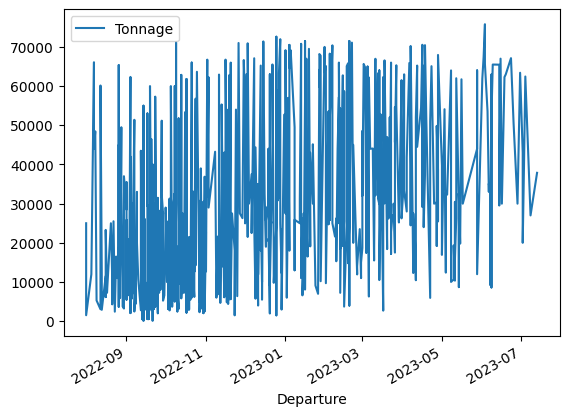

In [113]:
# Question 5 : Have we seen growth in the total tonnage shipped each month to developing countries? (My Take?)
%matplotlib inline
filt =  (df['Development category'] == 'developing')
recentMonthes = df.loc[filt,['Tonnage','Departure']].sort_values(by='Departure',ascending=False)
recentMonthes.set_index('Departure').plot()

In [130]:
# Question 6 : Finally, what 10 flags are most commonly used on the ships coming from Ukraine? 
df['Flag'].value_counts().sort_values(ascending=False).head(10)

Flag
Liberia             215
Panama              210
Marshall Islands    161
Malta               118
Barbados             80
Palau                45
Türkiye              39
Belize               36
Comoros              33
Bahamas              20
Name: count, dtype: int64